# LFV Higgs decays in 2HDM with a seesaw type I

In this model the couplings that allows LFVHD are given by 

| Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|$h W^{+\mu} W^{-\nu}$|$i g m_{W} g_{\mu \nu}$|$h G_{W}^{+} G_{W}^{-}$|$\frac{-igm_h^2}{2 m_W}$|
|$h G_{W}^{+} {W}^{-\mu}$|$\frac{ig}{2}(p_{+}- p_0)_{\mu}$|$h G_{W}^{-} W^{+\mu}$|$\frac{i g}{2}\left(p_{0}-p_{-}\right)_{\mu}$|
|$\bar{n}_{i} e_{a} W_{\mu}^{+}$|$\frac{i g}{\sqrt{2}} U_{a i}^{\nu} \gamma^{\mu} P_{L}$|$\overline{e_{a}} n_{j} W_{\mu}^{-}$|$\frac{i g}{\sqrt{2}} U_{a j}^{\nu *} \gamma^{\mu} P_{L}$|
|$\bar{n}_{i} e_{a} G_{W}^{+}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a i}^{\nu}\left(m_{e_{a}} P_{R}-m_{n, i} P_{L}\right)$|$\overline{e_{a}} n_{j} G_{W}^{-}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a j}^{\nu *}\left(m_{e_{a}} P_{L}-m_{n, j} P_{R}\right)$|
|$h\overline{n_i}n_j$|$\frac{-i g}{2 m_W}\left[C_{i j}\left(P_{L} m_{n_{i}}+P_{R} m_{n_{j}}\right) \quad+C_{i j}^{*}\left(P_{L} m_{n_{j}}+P_{R} m_{n_{i}}\right)\right]$|$h\overline{e_a}e_a$|$\frac{-ig m_{e_a}}{2 m_W}$|




In [1]:
from sympy import symbols, init_printing, conjugate,I,pi,IndexedBase,sqrt,Add,simplify,factor,conjugate
init_printing()

**Assigning masses of initial and final particles**

In [2]:
import OneLoopLFVHD as lfvhd

**Defining symbolic variables**

In [3]:
g = symbols('g',positive=True)
mW,mG = symbols('m_W,m_G',positive=True)


Uν = IndexedBase(r'{{U^\nu}}')
Uνc = IndexedBase(r'{{U^{\nu *}}}')
mn = IndexedBase(r'{{m_n}}')
#me = IndexedBase(r'{{m_e}}')
C = IndexedBase(r'C')
Cc = IndexedBase(r'{{C^*}}')
a,b,i,j = symbols('a,b,i,j',integer=True)

In [4]:
mh = lfvhd.ma
me = {a:lfvhd.mi,b:lfvhd.mj}
me

**Defining vertexes**

In [5]:
vertexhWW = lfvhd.VertexHVV(I*g*mW)
vertexhGG = lfvhd.VertexHSS((-I*g*mh**2)/(2*mW))

vertexhWG = lfvhd.VertexHVpSm(I*g/2)
vertexhGW = lfvhd.VertexHSpVm(I*g/2)

vertexneWu =lambda i,a: lfvhd.VertexVFF(0,I*g/sqrt(2)*Uν[a,i])
vertexenWd =lambda j,b: lfvhd.VertexVFF(0,I*g/sqrt(2)*Uνc[b,j])

vertexneGu = lambda i,a: lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*me[a]*Uν[a,i],
                                         (I*g)/(sqrt(2)*mW)*mn[i]*Uν[a,i])

vertexenGd = lambda j,b: lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mn[j]*Uνc[b,j],
                                         (-I*g)/(sqrt(2)*mW)*me[b]*Uνc[b,j])

vertexhnn = lambda i,j: lfvhd.VertexHF0F0((-I*g)/(2*mW)*(mn[j]*C[i,j] + mn[i]*Cc[i,j]),
                                          (-I*g)/(2*mW)*(mn[i]*C[i,j] + mn[j]*Cc[i,j]))

vertexhee = lambda a:lfvhd.VertexHFF((-I*g*me[a])/(2*mW))

## Form factors of SeeSaw model

We are taking the diagrams of [Lepton flavor violating Higgs boson decays from massive seesaw neutrinos](https://arxiv.org/pdf/hep-ph/0407302.pdf), and we reproduce the form factor of [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc)

### Triangle Gninj
The **left** form factor

In [6]:
A = g**3/(64*pi**2*mW**3) # Favtor to simplify expressions
m = IndexedBase('m')
h,ea,eb = symbols('h,e_a,e_b');
cambios = {lfvhd.ma:m[h],lfvhd.mi:m[a],lfvhd.mj:m[b]}
cambios_cross = {lfvhd.ma:m[h],lfvhd.mi:m[b],lfvhd.mj:m[a]}

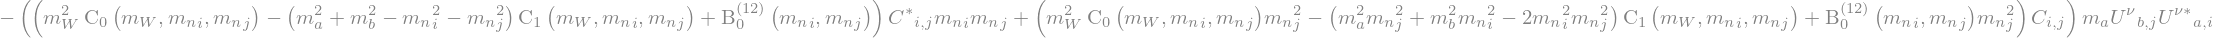

In [7]:
triangleGninj = lfvhd.TriangleSFF(vertexhnn(i,j),vertexneGu(j,b),vertexenGd(i,a),[mW,mn[i],mn[j]])
AL1 = (-triangleGninj.AL()/A).expand().collect([C[i,j],Cc[i,j]],simplify).collect(triangleGninj.Cs
                                                            ).simplify().subs(cambios)
AL1

#### Divergent term

In [8]:
AL1.subs(lfvhd.cambiosDivFin(mW,mn[i],mn[j])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe

The **right** form factor is given by

In [ ]:
AR1 = (-triangleGninj.AR()/A).expand().collect([C[i,j],Cc[i,j]],simplify).collect([lfvhd.C2(mW,mn[i],mn[j])]).simplify(
).simplify().subs(cambios)
AR1

#### Divergent term

In [ ]:
AR1.subs(lfvhd.cambiosDivFin(mW,mn[i],mn[j])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe

### Triangle Wninj

This is the diagram 2 of our reference 

In [ ]:
triangleWninj = lfvhd.TriangleVFF(vertexhnn(i,j),vertexneWu(j,b),vertexenWd(i,a),[mW,mn[i],mn[j]])

**Left form factor**

In [ ]:
AL2 = (-triangleWninj.AL().subs(lfvhd.D,4)/A).expand().collect([C[i,j],Cc[i,j]],simplify).subs(
    cambios).simplify()
AL2

**Right form factor**

In [ ]:
AR2 = (-triangleWninj.AR().subs(lfvhd.D,4)/A).expand().collect([C[i,j],Cc[i,j]],simplify).subs(
    cambios).simplify()
AR2

### Triangle niWW

This is the diagram 3 of our reference 

In [ ]:
triangleniWW = lfvhd.TriangleFVV(vertexhWW,vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW,mW])

**Left form factor**

In [ ]:
AL3 = (-triangleniWW.AL().subs(lfvhd.D,4)/A).subs(cambios)
AL3

**Right form factor**

In [ ]:
(-triangleniWW.AR().subs(lfvhd.D,4)/A).subs(cambios)

### Triangle niWG

This is the diagram 4 of our reference

In [ ]:
triangleniWG = lfvhd.TriangleFVS(vertexhWG,vertexneGu(i,b),vertexenWd(i,a),[mn[i],mW,mW])

**Left form factor**

In [ ]:
AL4 = (-triangleniWG.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)
AL4

**Right form factor**

In [ ]:
(-triangleniWG.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)

### Triangle niGW

This is the diagram 5 of our reference

In [ ]:
triangleniGW = lfvhd.TriangleFSV(vertexhGW,vertexneWu(i,b),vertexenGd(i,a),[mn[i],mW,mW])

**Left form factor**

In [ ]:
AL5 = (-triangleniGW.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)
AL5

**Right form factor**

In [ ]:
(-triangleniGW.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)

### Triangle niGG

This is the diagram 6 of our reference

In [ ]:
triangleniGG = lfvhd.TriangleFSS(vertexhGG,vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW,mW])

**Left form factor**

In [ ]:
AL6 = (-triangleniGG.AL()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AL6

**Right form factor**

In [ ]:
(-triangleniGG.AR()/A).expand().collect([mn[i]],simplify
                                  ).simplify().subs(cambios)

### Bubble niW

This is the diagram 7 of our reference 

In [ ]:
bubbleniW = lfvhd.BubbleFV(vertexhee(b),vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW])

**Left form factor**

In [ ]:
AL7 = (-bubbleniW.AL()/A).subs(lfvhd.D,4).subs(cambios)
AL7

**Right form factor**

In [ ]:
(-bubbleniW.AR()/A).subs(lfvhd.D,4).subs(cambios)

### Bubble Wni

This is the diagram 9 of our reference 

In [ ]:
bubbleWni = lfvhd.BubbleVF(vertexhee(a),vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW])

**Left form factor**

In [ ]:
AL9 = (-bubbleWni.AL()/A).subs(lfvhd.D,4).subs(cambios).simplify()
AL9

**Right form factor**

In [ ]:
(-bubbleWni.AR()/A).subs(lfvhd.D,4).subs(cambios).simplify()

**Adding bubble niW y Wni**

In [ ]:
BniW_L =  (bubbleniW.AL() + bubbleWni.AL()).subs(lfvhd.D,4).simplify()
BniW_L

In [ ]:
BniW_R =  (bubbleniW.AR() + bubbleWni.AR()).subs(lfvhd.D,4).simplify()
BniW_R.subs(lfvhd.cambiosDivFin(mn[i],mW,mW))

In [ ]:
BniW_L.subs(lfvhd.cambiosDivFin(mn[i],mW,mW))

### Bubble niG

This is the diagram 8 of our reference

In [ ]:
bubbleniG = lfvhd.BubbleFS(vertexhee(b),vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW])

**Left form factor**

In [ ]:
AL8 = (-bubbleniG.AL()/A).collect([
    lfvhd.B1_0(mn[i],mW),lfvhd.B1_1(mn[i],mW)]).simplify().subs(cambios)
AL8

**Right form factor**

In [ ]:
AR8 = (-bubbleniG.AR()/A).collect([
    lfvhd.B1_0(mn[i],mW),lfvhd.B1_1(mn[i],mW)]).simplify().subs(cambios)
AR8

### Bubble Gni

This is the diagram 10 of our reference

In [ ]:
bubbleGni = lfvhd.BubbleSF(vertexhee(a),vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW])

**Left form factor**

In [ ]:
AL10 = (-bubbleGni.AL()/A).collect([
      lfvhd.B2_0(mn[i],mW),lfvhd.B2_1(mn[i],mW)]).simplify().subs(cambios)
AL10

**Right form factor**

In [ ]:
AR10 = (-bubbleGni.AR()/A).collect([
    lfvhd.B2_0(mn[i],mW),lfvhd.B2_1(mn[i],mW)]).simplify().subs(cambios)
AR10

**Adding bubble niG y Gni**

In [ ]:
DivniG = ((AL8 + AL10).subs(lfvhd.cambiosDivFin(mn[i],mW,mW)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()*A
DivniG

In [ ]:
DivL1 = -triangleGninj.AL().subs(
    lfvhd.cambiosDivFin(mW,mn[i],mn[j])).expand().collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe
DivL1 = DivL1.expand().subs(C[i,j],0).subs(cambios).subs({Cc[i,j]:1,Uν[b,j]:Uν[b,i],mn[j]:mn[i]})
DivL1

In [ ]:
DivniG + DivL1

## Adding all contributions

In [ ]:
from sympy import Symbol,lambdify

In [ ]:
TrianglesTwoFermion = [triangleGninj,triangleWninj]
TrianglesOneFermion = [triangleniWW,
         triangleniWG,triangleniGW,
         triangleniGG]
Bubbles = [bubbleniW,bubbleniG,bubbleWni,bubbleGni]

In [ ]:
ALOneFermion = 0;AROneFermion = 0;
for topology in [TrianglesOneFermion,Bubbles]:
    for diag in topology:
        masas = diag.masas
        #display(masas)
        if len(masas)==3:
            splitting = lfvhd.cambiosDivFin(*masas)
            aprroximation = lfvhd.cambios_aprox(*masas)
        else:
            splitting = lfvhd.cambiosDivFin(*masas,mW)
            aprroximation = lfvhd.cambios_aprox(*masas,mW)
        AL = diag.AL().subs(splitting).subs(lfvhd.D,4).subs(lfvhd.Δe,0)
        AR = diag.AR().subs(splitting).subs(lfvhd.D,4).subs(lfvhd.Δe,0)
        ALOneFermion += AL.subs(aprroximation)#.subs(cambios)
        AROneFermion += AR.subs(aprroximation)#.subs(cambios)
        display(ALOneFermion.atoms(Symbol))

In [ ]:
list(ALOneFermion.expand().collect([mn[i]],evaluate=False).keys())

### Form factor with two fermion in the loop.

In [ ]:
ALTwoFermion = 0;ARTwoFermion = 0;
for diag in TrianglesTwoFermion:
    masas = diag.masas
    display(masas)
    splitting = lfvhd.cambiosDivFin(*masas)
    aprroximation = lfvhd.cambios_aprox(*masas)
    AL = diag.AL().subs(splitting)
    AR = diag.AR().subs(splitting)
    ALTwoFermion += AL.subs(lfvhd.D,4).subs(
    lfvhd.Δe,0).subs(aprroximation)
    ARTwoFermion += AR.subs(lfvhd.D,4).subs(
    lfvhd.Δe,0).subs(aprroximation)
    

#### AL TwoFermion

In [ ]:
ALTwoFermion.expand().args[0]